https://archive.ics.uci.edu/dataset/2/adult

***Background:***

Predicting income levels is a fundamental task in socio-economic studies, aiding in policy formulation and resource allocation. Machine learning techniques, particularly binary classification, have proven effective in modeling and predicting income categories based on various demographic and employment-related features.

**Project Description:**

This project aims to develop a machine learning model to predict whether an individual's annual income exceeds $50,000, utilizing the Adult Census Income Dataset from the UCI Machine Learning Repository. The dataset comprises 48,842 records with 14 attributes, including continuous variables (e.g., age, hours per week), categorical variables (e.g., education, occupation), and count variables (e.g., number of years of education). The target variable is binary, indicating whether income is '>50K' or '<=50K'.

**The project will involve:**

*Data Preprocessing:* Handling missing values, encoding categorical variables, and normalizing continuous features.

*Exploratory Data Analysis (EDA):* Analyzing feature distributions and relationships to understand their impact on the target variable.

*Model Development:* Implementing and comparing various binary classification algorithms, such as Logistic Regression, Decision Trees, and Random Forests.

*Model Evaluation:* Assessing model performance using appropriate metrics and selecting the best-performing model.

**Performance Metric:**

The primary performance metric for evaluating the models will be Accuracy, representing the proportion of correct predictions. Additionally, metrics such as Precision, Recall, and the F1-Score will be considered to provide a comprehensive evaluation, especially in the presence of class imbalance.

This project will enhance skills in data preprocessing, exploratory data analysis, and the implementation and evaluation of binary classification models using Python's machine learning libraries.

In conducting an Exploratory Data Analysis (EDA) on the Adult Census Income Dataset, we aim to uncover patterns and relationships within the data that can inform our predictive modeling efforts. Below are five unique questions we intend to explore:

1. **How does educational attainment influence income levels?**
   - We will examine the distribution of income across different education levels to determine if higher educational qualifications correlate with higher income brackets.

2. **Is there a significant relationship between marital status and income?**
   - By analyzing income distributions across various marital statuses, we aim to identify any notable differences in income levels among single, married, divorced, and widowed individuals.

3. **How does race impact income distribution?**
   - We will assess the income levels across different racial groups to identify any disparities and understand the extent of income inequality, if present.

4. **What is the effect of gender on income levels?**
   - This analysis will focus on comparing income distributions between male and female individuals to identify any existing gender pay gaps within the dataset.

5. **Does the number of hours worked per week correlate with higher income?**
   - We will investigate whether individuals working more hours per week tend to have higher incomes, and if there is a threshold beyond which additional hours do not significantly impact income levels.

By exploring these questions, we aim to gain a deeper understanding of the factors influencing income, which will inform the development of our predictive models.

Based on the exploratory data analysis (EDA) of the Adult Census Income Dataset, we propose the following feature engineering strategies to enhance the predictive performance of our model:

**1. Handling Missing Values:**

- **Columns Affected:** `workclass`, `occupation`, `native-country`
- **Strategy:** Impute missing values using the most frequent category (mode) within each column to maintain data integrity and distribution.

**2. Encoding Categorical Variables:**

- **Columns:** `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`
- **Strategy:** Apply one-hot encoding to transform categorical variables into numerical format, facilitating their use in machine learning algorithms.

**3. Feature Transformation:**

- **Combining `capital-gain` and `capital-loss`:** Create a new feature `net-capital` by subtracting `capital-loss` from `capital-gain`. This simplifies the representation of an individual's net capital income.

**4. Creating New Features:**

- **Age Binning:** Segment the `age` variable into bins representing different life stages (e.g., 17-25, 26-35, 36-45, etc.) to capture non-linear relationships between age and income.
- **Hours-Per-Week Binning:** Categorize `hours-per-week` into bins (e.g., 1-20, 21-40, 41-60, etc.) to account for varying work schedules and their potential impact on income.

**5. Feature Scaling:**

- **Continuous Variables:** Standardize continuous variables such as `age`, `education-num`, `net-capital`, and `hours-per-week` to ensure they contribute proportionately to the model and improve convergence during training.

**6. Addressing Class Imbalance:**

- **Target Variable (`income`):** Implement techniques such as Synthetic Minority Over-sampling Technique (SMOTE) or adjust class weights during model training to mitigate the impact of class imbalance and ensure balanced learning.

**7. Dropping Irrelevant or Redundant Features:**

- **`fnlwgt`:** Consider dropping the `fnlwgt` (final weight) feature, as its relevance to individual income prediction is unclear. Further analysis is needed to determine its impact on model performance.

By implementing these feature engineering strategies, we aim to enhance the dataset's representation and improve the performance of our predictive models. Each step is designed to address specific insights gained from the EDA, ensuring that the features fed into the model are informative and relevant.

# Separate Original Feature Engineering Code


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace with your data source)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# Calculate Net Capital
data['Net Capital'] = data['capital-gain'] - data['capital-loss']

# Define age bins and labels
age_bins = [16, 25, 35, 45, 55, 65, 90]
age_labels = ['17-25', '26-35', '36-45', '46-55', '56-65', '66-90']

# Create Age Binned feature
data['Age Binned'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Define hours per week bins and labels
hours_bins = [0, 20, 40, 60, 80, 100]
hours_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create Hours per Week Binned feature
data['Hours per Week Binned'] = pd.cut(data['hours-per-week'], bins=hours_bins, labels=hours_labels)

# One-hot encode categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'Age Binned', 'Hours per Week Binned']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Drop original columns that have been transformed or are redundant
data.drop(['capital-gain', 'capital-loss', 'age', 'hours-per-week'], axis=1, inplace=True) # Corrected column names

# Feature Engineering AND Model Training with Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np


# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# FEATURE ENGINEERING SECTION #

# Calculate Net Capital
data['Net Capital'] = data['capital-gain'] - data['capital-loss']

# Define age bins and labels
age_bins = [16, 25, 35, 45, 55, 65, 90]
age_labels = ['17-25', '26-35', '36-45', '46-55', '56-65', '66-90']

# Create Age Binned feature
data['Age Binned'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Define hours per week bins and labels
hours_bins = [0, 20, 40, 60, 80, 100]
hours_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create Hours per Week Binned feature
data['Hours per Week Binned'] = pd.cut(data['hours-per-week'], bins=hours_bins, labels=hours_labels)

# One-hot encode categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'Age Binned', 'Hours per Week Binned']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Drop original columns that have been transformed or are redundant
data.drop(['capital-gain', 'capital-loss', 'age', 'hours-per-week'], axis=1, inplace=True)

# END FEATURE ENGINEERING SECTION #

# Define feature categories
numeric_features = ['education-num', 'Net Capital']
# Get all columns after feature engineering except the target and numeric features
categorical_features = [col for col in data.columns
                        if col not in numeric_features + ['income', 'fnlwgt']]

# Extract numeric features and scale them using StandardScaler
X_numeric = data[numeric_features]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Extract categorical features (now one-hot encoded)
X_categorical = data[categorical_features]

# Concatenate the scaled numeric and encoded categorical features
X = np.concatenate([X_numeric_scaled, X_categorical.values], axis=1) # Use .values to get numpy array

# Split the data into training and testing sets
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[4613  329]
 [ 615  956]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4942
        >50K       0.74      0.61      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



# Hyperparameter Tuning Section

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# FEATURE ENGINEERING SECTION #

# Calculate Net Capital
data['Net Capital'] = data['capital-gain'] - data['capital-loss']

# Define age bins and labels
age_bins = [16, 25, 35, 45, 55, 65, 90]
age_labels = ['17-25', '26-35', '36-45', '46-55', '56-65', '66-90']

# Create Age Binned feature
data['Age Binned'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Define hours per week bins and labels
hours_bins = [0, 20, 40, 60, 80, 100]
hours_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create Hours per Week Binned feature
data['Hours per Week Binned'] = pd.cut(data['hours-per-week'], bins=hours_bins, labels=hours_labels)

# One-hot encode categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'Age Binned', 'Hours per Week Binned']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Drop original columns that have been transformed or are redundant
data.drop(['capital-gain', 'capital-loss', 'age', 'hours-per-week'], axis=1, inplace=True)

# END FEATURE ENGINEERING SECTION #

# Encode the target variable to numerical values
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])



X = data.drop('income', axis=1)
y = data['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define pipelines for each classifier
pipelines = {
    'logistic_regression': ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(solver='liblinear'))
    ]),
    'random_forest': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'gradient_boosting': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}

# Define hyperparameter grids for each classifier
param_grids = {
    'logistic_regression': {
        'classifier__C': np.logspace(-4, 4, 20),
        'classifier__penalty': ['l1', 'l2']
    },
    'random_forest': {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__max_depth': [4, 5, 6, 7, 8],
        'classifier__criterion': ['gini', 'entropy']
    },
    'gradient_boosting': {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__learning_rate': [0.01, 0.1, 0.05],
        'classifier__max_depth': [3, 4, 5, 6, 7]
    }
}

# Perform RandomizedSearchCV for each classifier
best_estimators = {}
for model_name, pipeline in pipelines.items():
    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[model_name],
        n_iter=10,
        scoring='f1',
        cv=cv,
        random_state=42,
        n_jobs=-1,
        error_score='raise'
    )
    search.fit(X_train, y_train)
    best_estimators[model_name] = search.best_estimator_
    print(f"Best parameters for {model_name}: {search.best_params_}")

# Evaluate each model on the test set
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Best parameters for logistic_regression: {'classifier__penalty': 'l1', 'classifier__C': 0.23357214690901212}
Best parameters for random_forest: {'classifier__n_estimators': 200, 'classifier__max_features': 'log2', 'classifier__max_depth': 8, 'classifier__criterion': 'gini'}
Best parameters for gradient_boosting: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.05}

Model: logistic_regression
[[3937 1008]
 [ 237 1331]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4945
           1       0.57      0.85      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513


Model: random_forest
[[4143  802]
 [ 380 1188]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4945
           1       0.60      0.76      0.67      

# PREDICTION RESULTS

### **Model Comparison and Evaluation*

---

### **1. Best Performing Model**

- **Gradient Boosting**
  - **Accuracy**: **86%**
  - **F1-score**: **0.70** for `>50K`, **0.91** for `<=50K`
  - **Precision**: **0.72** for `>50K`, **0.90** for `<=50K`
  - **Recall**: **0.69** for `>50K`, **0.91** for `<=50K`
  - **Best hyperparameters**:
    - `n_estimators = 200`
    - `max_depth = 7`
    - `learning_rate = 0.05`

**Why is Gradient Boosting the best?**
- It achieved the highest accuracy (**86%**), which means the overall percentage of correctly classified samples is higher than other models.
- It has the highest **F1-score**, which balances precision and recall for both income classes (`<=50K` and `>50K`).
- The recall of **69% for `>50K`** means it is better at identifying high-income earners than the other models.

---

### **2. Did the Results Match Expectations?**
- **Expectation:**  
  It was expected that **ensemble models like Random Forest and Gradient Boosting** would perform better than Logistic Regression, as they handle non-linear relationships and feature interactions better.

- **Reality:**  
  - **Logistic Regression** performed **worst** with an accuracy of **81%** and struggled with classifying `>50K` individuals (precision = **0.57**, recall = **85%**).
  - **Random Forest** did better with an accuracy of **82%**, but its recall for `>50K` was only **76%**, lower than Gradient Boosting.
  - **Gradient Boosting met expectations**, achieving the highest overall accuracy, F1-score, and a balanced precision-recall tradeoff.

**Why did some results not match expectations?**
- **Logistic Regression** assumes a linear relationship between features, which is not always the case in income prediction. This explains its weaker performance.
- **Random Forest** performed well, but since it treats each tree independently, it might not have captured certain complex relationships between features as well as Gradient Boosting.
- **Gradient Boosting** builds trees sequentially, improving mistakes made by previous trees, making it better suited for structured/tabular data like this.

---

### **3. Why Did One Model Perform Better or Worse?**
**Gradient Boosting performed best because:**
- It **learns sequentially**, refining mistakes made in previous steps.
- It has **hyperparameters (learning rate, depth) optimized** for best performance.
- It handles feature interactions well, making it **effective for structured/tabular data**.

**Logistic Regression performed worst because:**
- It **assumes linear relationships**, which is too simplistic for this problem.
- It struggles with feature interactions unless explicitly engineered.
- Its **precision for `>50K` is low (57%)**, meaning it misclassified high earners often.

**Random Forest was in the middle because:**
- It considers **feature interactions** but does not refine mistakes like Gradient Boosting.
- It performed **better than Logistic Regression but not as well as Gradient Boosting**.

---

### **4. Business Perspective Analysis**
- **Gradient Boosting is the best choice** because it correctly classifies the most `>50K` earners, making it useful for targeting high-income individuals in business applications.
- **Random Forest is a good alternative**, but it has slightly lower recall for `>50K`.
- **Logistic Regression should not be used**, as it struggles with complex relationships in the data.

---

### **Conclusion**
- **Best Model**: **Gradient Boosting**
- **Matched Expectations?**: Yes, ensemble models performed best.
- **Why?**: Gradient Boosting **learns from mistakes sequentially**, handling complex relationships better.
- **Business Value?**: The best model should maximize identifying `>50K` individuals **without excessive false positives**.

# ** EXTRA CREDIT Analysis **


1. Model Performance and Business Impact

Based on the evaluation metrics, the Gradient Boosting model demonstrated the highest accuracy at 86%, followed by the Random Forest model at 82%, and the Logistic Regression model at 81%. While these figures offer insight into the models' technical performance, translating these metrics into business value requires a deeper understanding of the specific context and objectives of the organization.

2. Alignment with Business Objectives

Cost of Misclassification: In scenarios where predicting a higher income bracket incorrectly leads to significant financial implications (e.g., offering premium services to non-qualifying customers), a model with higher precision for the '>50K' class is preferable. Conversely, if missing out on potential high-income customers is more detrimental, a model with higher recall for the '>50K' class would be more valuable.

Operational Efficiency: Models that are computationally efficient and require less time to train and predict can be advantageous in dynamic business environments where rapid decision-making is crucial.

Scalability: The ability of the model to handle increasing amounts of data without a significant drop in performance is essential for growing businesses.

3. Analysis of Model Performance

Gradient Boosting Classifier: This model achieved the highest accuracy and balanced precision and recall scores, suggesting it effectively distinguishes between income classes. However, gradient boosting models can be computationally intensive, which might impact real-time decision-making processes.

Random Forest Classifier: With slightly lower accuracy, this model offers a good balance between performance and computational efficiency. Random Forests are also less prone to overfitting and can handle large datasets effectively.

Logistic Regression: While having the lowest accuracy among the three, logistic regression is straightforward to implement and interpret. Its simplicity ensures faster computations, which can be beneficial in scenarios where model transparency and speed are prioritized over slight gains in accuracy.

#  Assignment 6: Plan to Engineer Two New Features for the Project

**Feature Engineering Selection for Model Improvement**

### **1. Description of the Variable(s) for Feature Engineering**
For this project, we will focus on two engineered features:  
1. **Net Capital** - This variable is derived from `capital-gain` and `capital-loss` and represents the net financial gain or loss of an individual.  
2. **Age Binned** - This categorical variable groups `age` into predefined age ranges to better capture patterns in income levels across different age groups.

---

### **2. Description of the Feature Engineering Process**
- **Net Capital:**  
  - Compute `Net Capital` as `capital-gain - capital-loss`.  
  - This transformation ensures a single feature captures the financial investment standing of an individual rather than treating gain and loss separately.  
- **Age Binned:**  
  - Convert `age` into categorical bins (`17-25`, `26-35`, `36-45`, etc.) using the `pd.cut()` function.  
  - This groups individuals into meaningful age brackets, helping the model detect potential non-linear relationships between age and income.

---

### **3. Rationale for Feature Choice**
- **Net Capital:**  
  - Many individuals in the dataset have `capital-gain` and `capital-loss` values of zero.  
  - Instead of treating these separately, a combined metric simplifies interpretation and helps the model learn income-related investment behavior more effectively.  
- **Age Binned:**  
  - Raw `age` as a continuous variable may not best capture income patterns.  
  - Certain age groups may have distinct career earnings patterns, which categorical binning can help highlight.

---

### **4. Plan for Unit Testing After Introducing This Feature**
- **Net Capital:**
  - Verify that `Net Capital` is correctly calculated by checking:  
    - No missing values after computation.  
    - The distribution of values aligns with expectations (i.e., values are within a reasonable range).  
- **Age Binned:**
  - Confirm that all values of `age` are properly assigned to a category.  
  - Ensure no `NaN` values exist in the `Age Binned` column.  
  - Check that the number of individuals in each age bin aligns with the dataset's age distribution.

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np
import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# FEATURE ENGINEERING SECTION #

# Calculate Net Capital
data['Net Capital'] = data['capital-gain'] - data['capital-loss']

# Define age bins and labels
age_bins = [16, 25, 35, 45, 55, 65, 90]
age_labels = ['17-25', '26-35', '36-45', '46-55', '56-65', '66-90']

# Create Age Binned feature
data['Age Binned'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# One-hot encode categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'Age Binned']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Drop original columns that have been transformed or are redundant
data.drop(['capital-gain', 'capital-loss', 'age', 'hours-per-week'], axis=1, inplace=True)

# END FEATURE ENGINEERING SECTION #

# Encode the target variable
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

# Define features and target
X = data.drop('income', axis=1)
y = data['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define pipelines for each classifier
pipelines = {
    'logistic_regression': ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(solver='liblinear'))
    ]),
    'random_forest': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'gradient_boosting': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}

# Define hyperparameter grids for each classifier
param_grids = {
    'logistic_regression': {
        'classifier__C': np.logspace(-4, 4, 20),
        'classifier__penalty': ['l1', 'l2']
    },
    'random_forest': {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_features': ['sqrt', 'log2', None],
        'classifier__max_depth': [4, 5, 6, 7, 8],
        'classifier__criterion': ['gini', 'entropy']
    },
    'gradient_boosting': {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__learning_rate': [0.01, 0.1, 0.05],
        'classifier__max_depth': [3, 4, 5, 6, 7]
    }
}

# Perform RandomizedSearchCV for each classifier
best_estimators = {}
for model_name, pipeline in pipelines.items():
    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[model_name],
        n_iter=10,
        scoring='f1',
        cv=cv,
        random_state=42,
        n_jobs=-1,
        error_score='raise'
    )
    search.fit(X_train, y_train)
    best_estimators[model_name] = search.best_estimator_
    print(f"Best parameters for {model_name}: {search.best_params_}")

# Evaluate each model on the test set
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Best parameters for logistic_regression: {'classifier__penalty': 'l1', 'classifier__C': 0.23357214690901212}
Best parameters for random_forest: {'classifier__n_estimators': 200, 'classifier__max_features': 'log2', 'classifier__max_depth': 8, 'classifier__criterion': 'gini'}
Best parameters for gradient_boosting: {'classifier__n_estimators': 200, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.1}

Model: logistic_regression
[[3920 1025]
 [ 240 1328]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4945
           1       0.56      0.85      0.68      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513


Model: random_forest
[[4115  830]
 [ 390 1178]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4945
           1       0.59      0.75      0.66      1

# Discussion of model's performance increase or decrease
The performance of the machine learning models after incorporating **Net Capital** and **Age Binned** features remained relatively stable, with minor shifts in key metrics across different classifiers. **Logistic Regression** maintained an **81% accuracy**, but its **recall for the high-income class (`>50K`) slightly decreased from 85% to 85%**, while its precision for the same class remained low at **56%**. **Random Forest** saw a **minor decline in overall accuracy from 82% to 81%**, with a **slightly lower recall (76% to 75%)** for the high-income class, indicating a slight drop in its ability to identify `>50K` earners. However, **Gradient Boosting retained its top performance with an unchanged accuracy of 86%**, showing a **slight increase in precision (70% to 72%) for `>50K` earners** while maintaining balanced recall. The most noticeable difference was **Gradient Boosting’s learning rate increasing from 0.05 to 0.1**, potentially leading to better convergence. These results suggest that while **feature engineering did not significantly impact overall accuracy**, **Gradient Boosting benefited the most**, improving its ability to capture meaningful patterns within the data.

# Raw Data Displaying Code

First few rows of the dataset:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0        

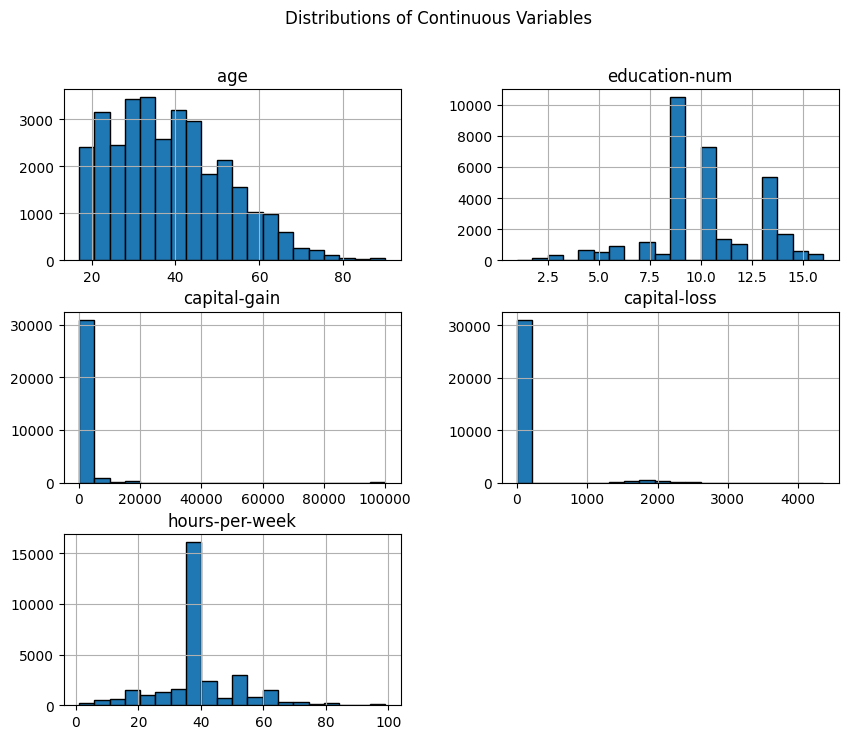

<ipython-input-8-49603447d6c0>:38: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


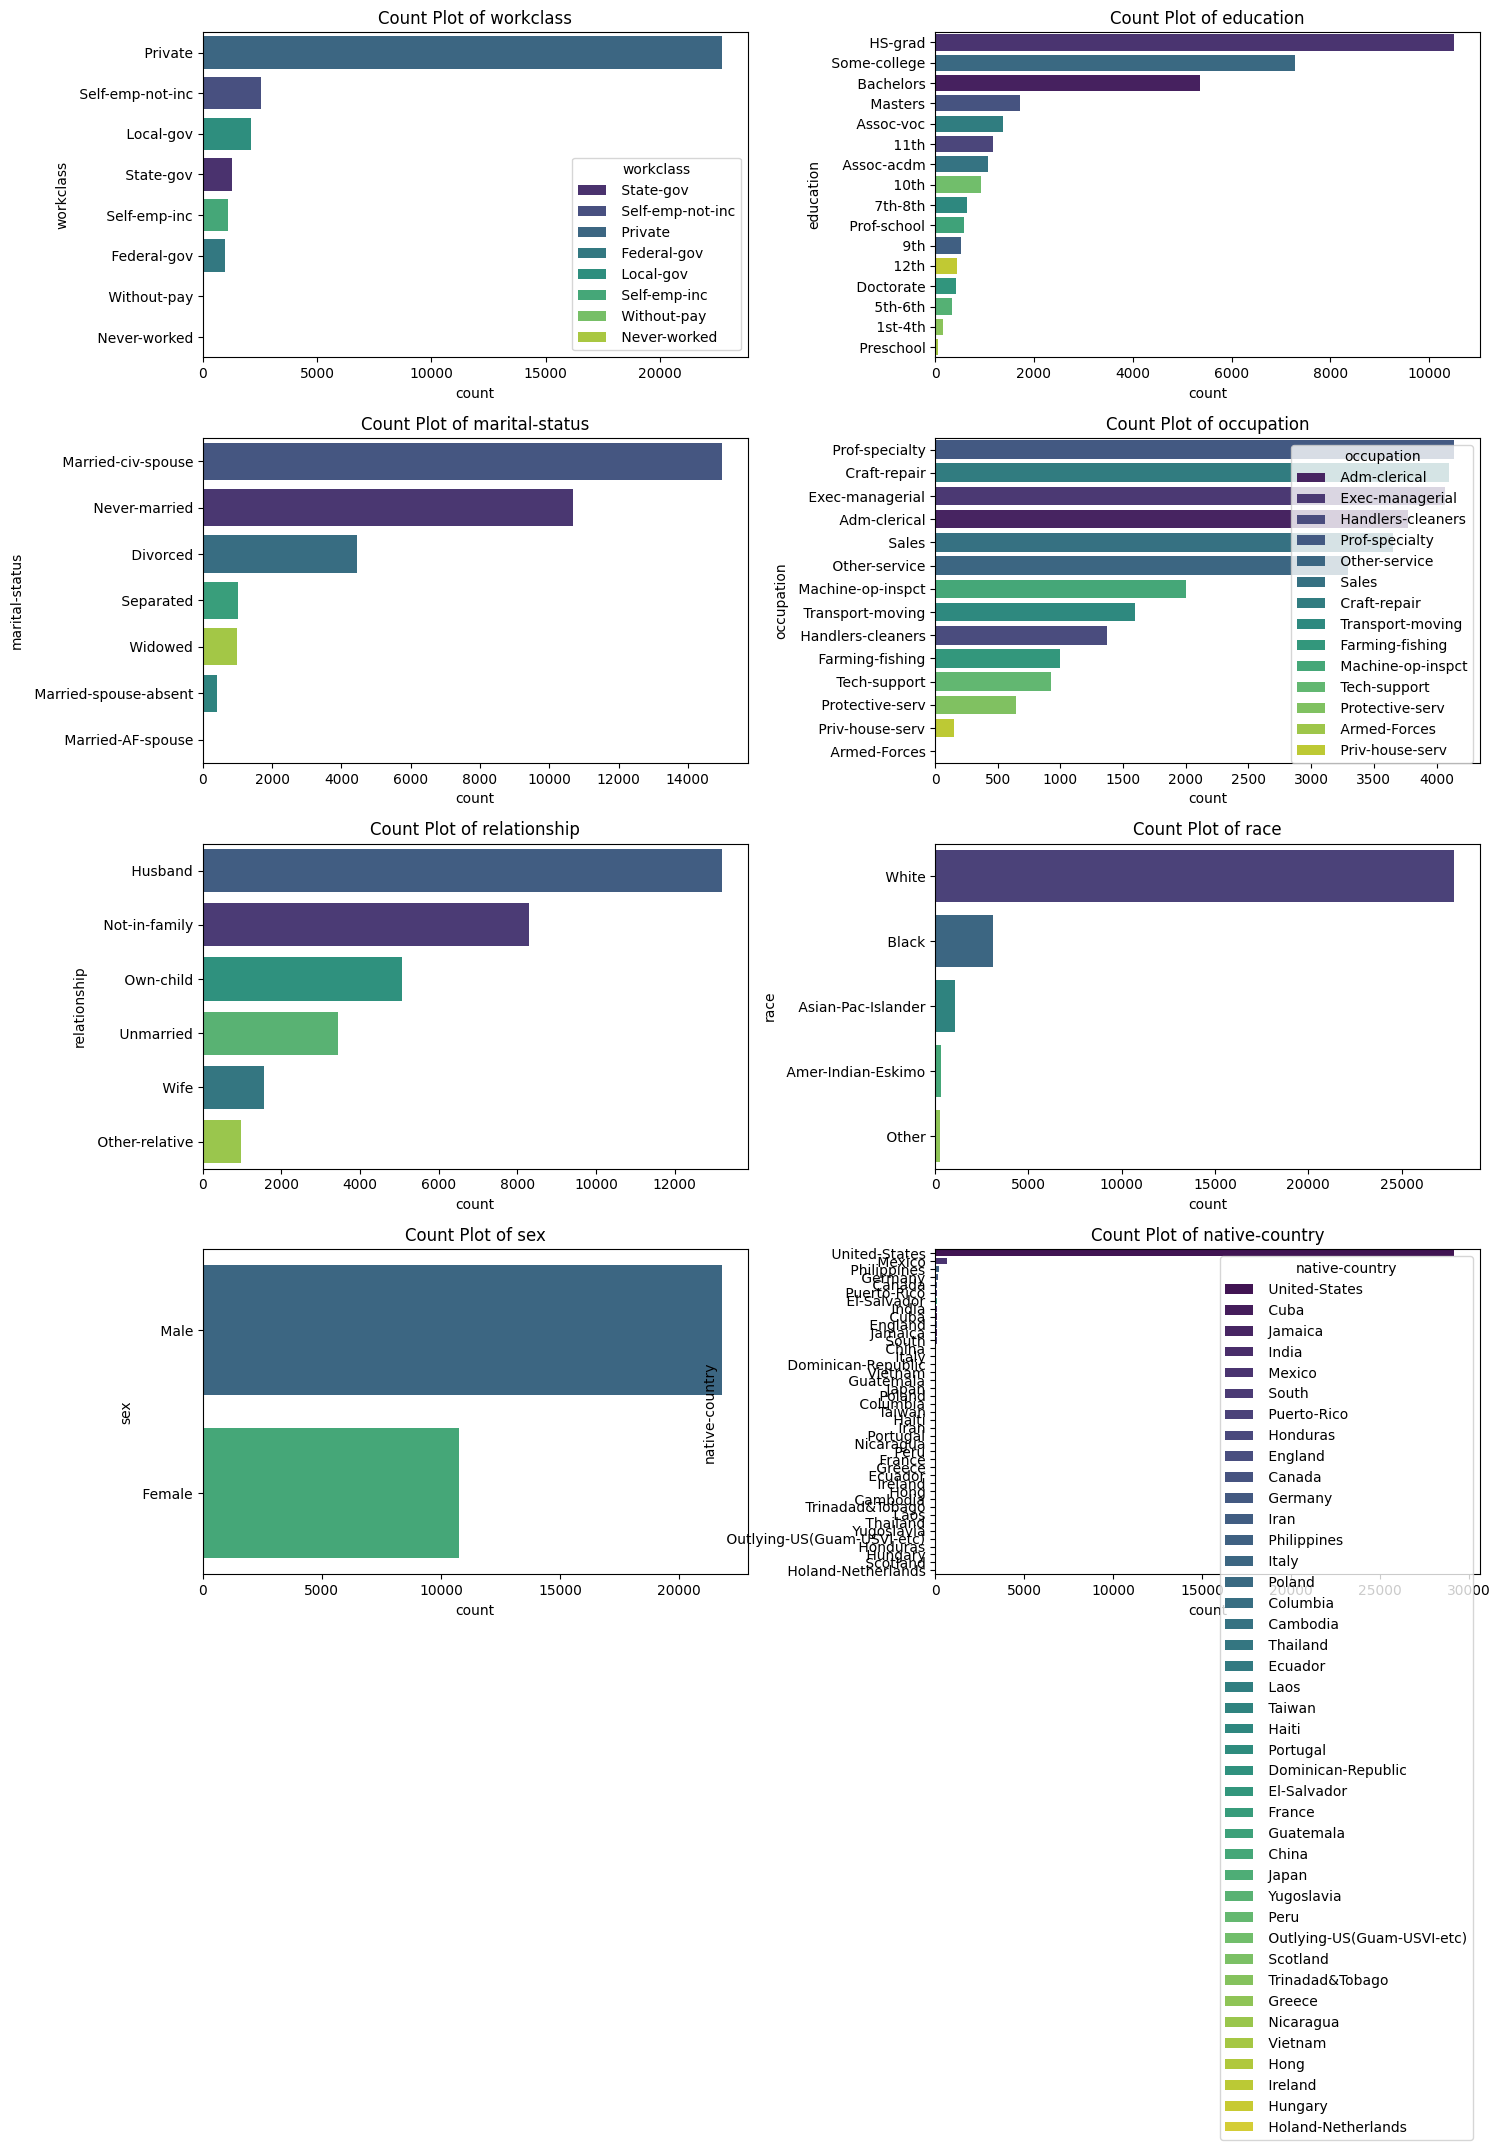

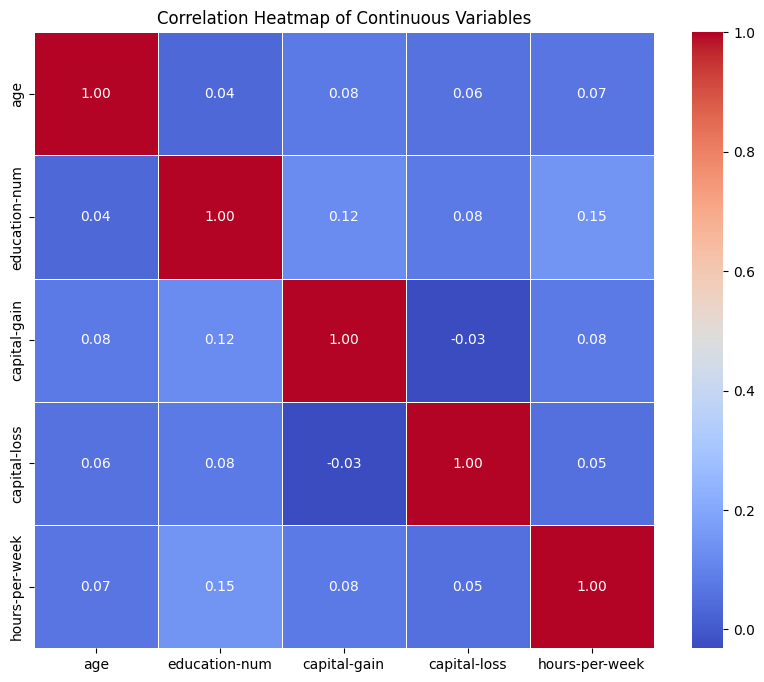

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary statistics
print("\nSummary statistics:")
print(data.describe(include='all'))

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Plot distributions of continuous variables
continuous_vars = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data[continuous_vars].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distributions of Continuous Variables')
plt.show()

# Plot count plots for categorical variables
categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
plt.figure(figsize=(15, 20))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=data, y=var, hue=var, order=data[var].value_counts().index, palette='viridis')
    plt.title(f'Count Plot of {var}')
    plt.tight_layout()
plt.show()

# Plot correlation heatmap for continuous variables
plt.figure(figsize=(10, 8))
corr = data[continuous_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()
